**Lending Club Loan Data Analysis**

Objective: Create a model that predicts whether or not a loan will be default using historical data.

Problem Statement:  
For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later, this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.
Domain: Finance

Analysis to be done: Perform data preprocessing and build a deep learning prediction model.

Content:
Dataset columns and definition:

●	credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
●	purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
●	int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
●	installment: The monthly installments owed by the borrower if the loan is funded.
●	log.annual.inc: The natural log of the self-reported annual income of the borrower.
●	dti: The debt-to-income ratio of the borrower (the amount of debt divided by annual income).
●	fico: The FICO credit score of the borrower.
●	days.with.cr.line: The number of days the borrower has had a credit line.
●	revol.bal: The borrower's revolving balance (the amount unpaid at the end of the credit card billing cycle).
●	revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
●	inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
●	delinq.2yrs: The number of times the borrower has been 30+ days past due on a payment in the past 2 years.
●	pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

Steps to perform:
Perform exploratory data analysis and feature engineering and then apply feature engineering. Follow up with a deep learning model to predict whether or not the loan will be default using the historical data.

Tasks:

1.     Feature Transformation

●	Transform categorical values into numerical values (discrete)

2.     Exploratory data analysis of different factors in the dataset.

3.     Additional Feature Engineering

●	You will check the correlation between features and drop those features that have a strong correlation.
●	This will help reduce the number of features and leave you with the most relevant features.

4.     Modeling

●	After applying EDA and feature engineering, you are now ready to build the predictive models.
●	In this part, you will create a deep learning model using Keras with Tensorflow backend.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the Dataset
df=pd.read_csv('loan_data.csv')

In [6]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


Data has no missing Values.

In [8]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [9]:
# Convert binary columns to boolean (0/1)
df['credit.policy'] = df['credit.policy'].astype(int)
df['not.fully.paid'] = df['not.fully.paid'].astype(int)

In [10]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


Task 2: Exploratory Data Analysis (EDA)

Goal: Gain insights into the data distribution, relationships between variables, and potential patterns.

Reasoning: EDA helps identify data characteristics, outliers, and informs feature engineering and model selection.

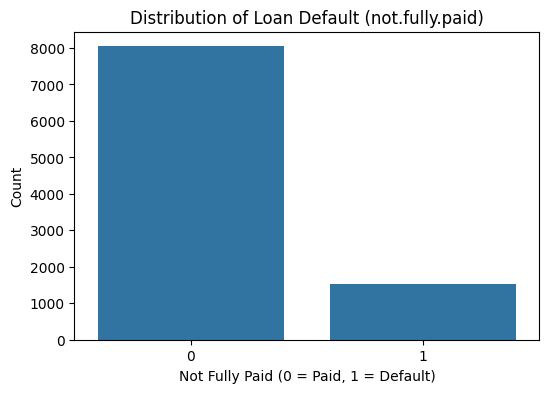

In [11]:
# Plot distribution of target variable (not.fully.paid)
plt.figure(figsize=(6, 4))
sns.countplot(x='not.fully.paid', data=df)
plt.title('Distribution of Loan Default (not.fully.paid)')
plt.xlabel('Not Fully Paid (0 = Paid, 1 = Default)')
plt.ylabel('Count')
plt.show()

The dataset is imbalanced (more non-defaults), which may affect model performance on the minority class (defaults).

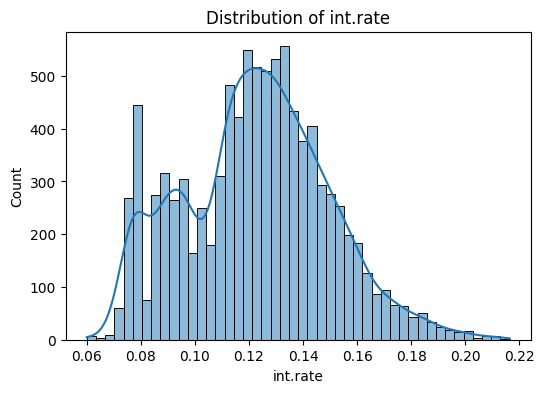

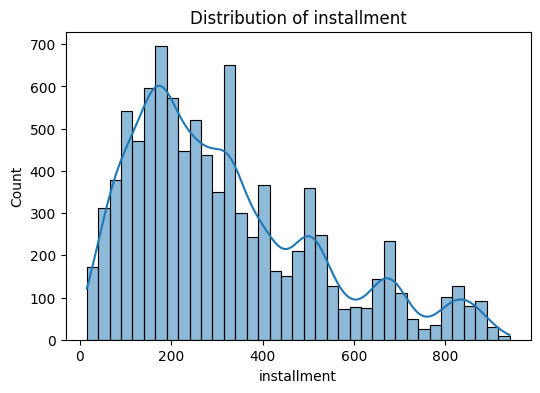

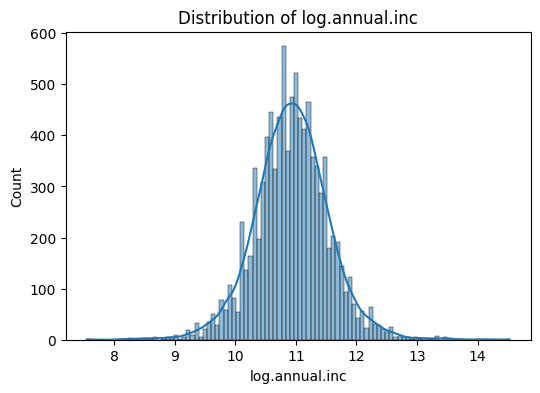

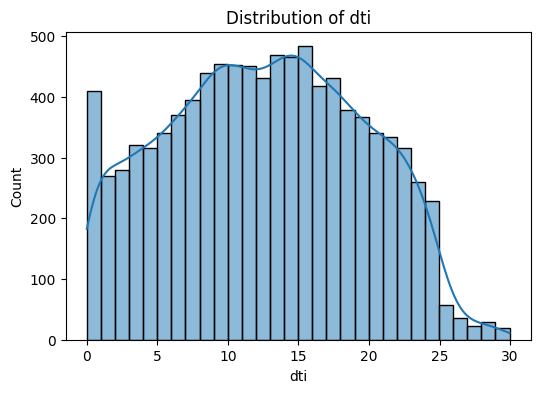

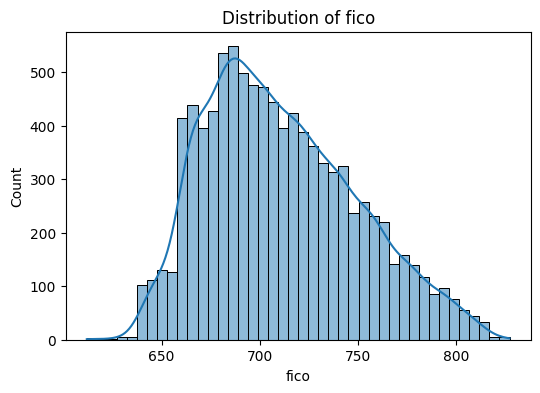

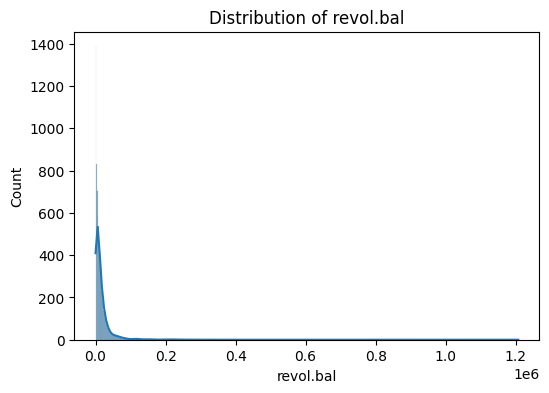

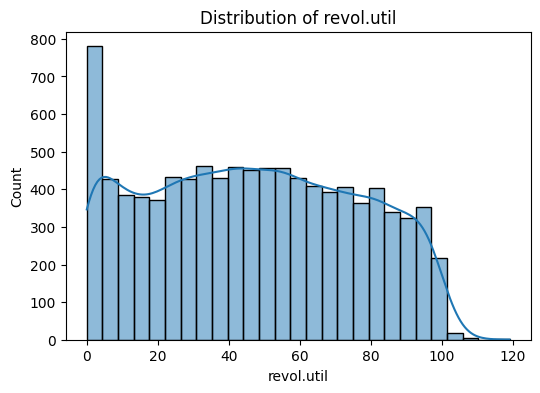

In [12]:
# Distribution of key numerical features
numerical_features = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'revol.bal', 'revol.util']
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

In [13]:
# One-hot encoding for 'purpose' column
df = pd.get_dummies(df, columns=['purpose'], drop_first=True)

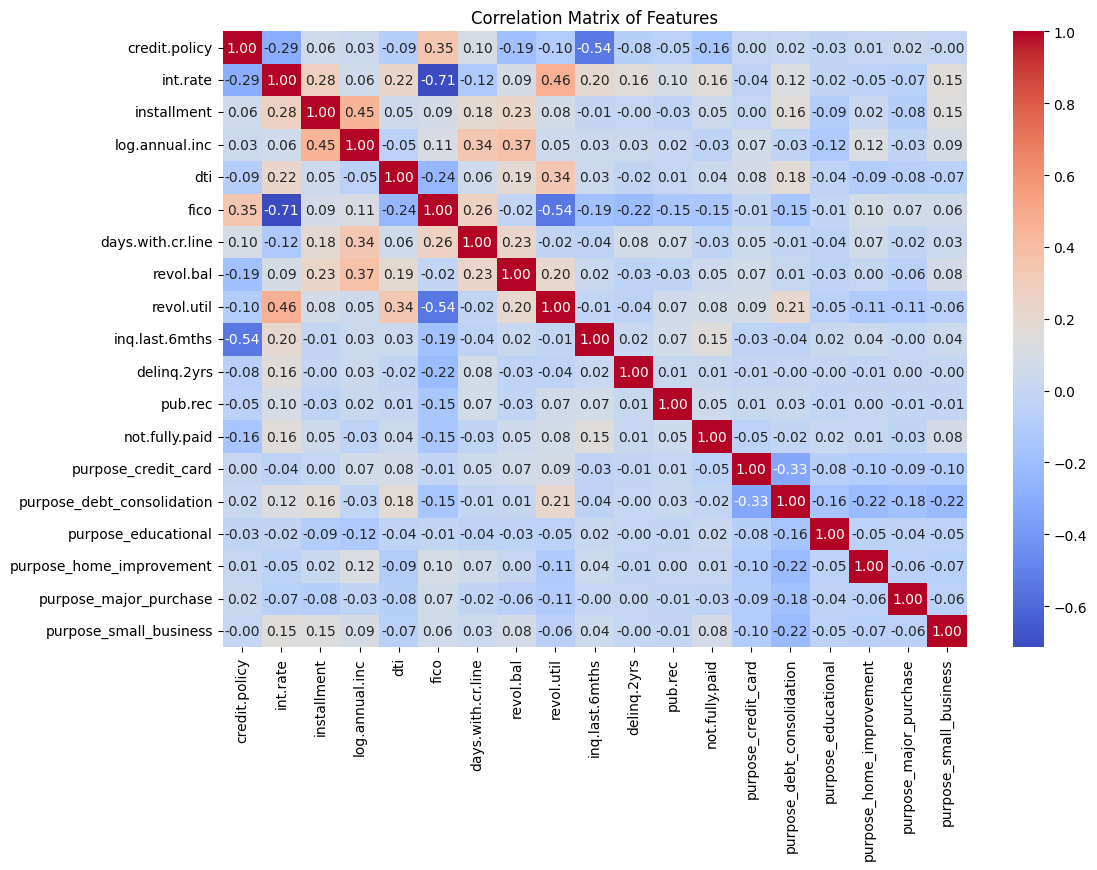

In [14]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

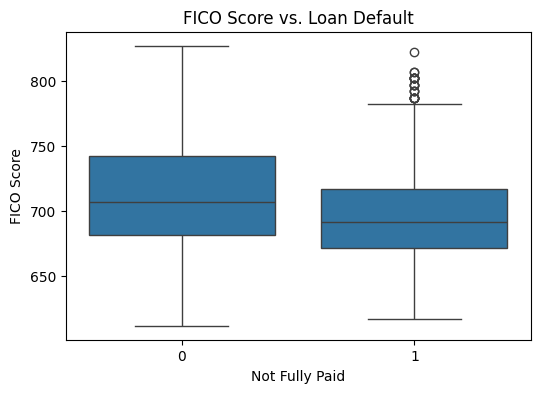

In [15]:
# Boxplot of FICO score vs. not.fully.paid
plt.figure(figsize=(6, 4))
sns.boxplot(x='not.fully.paid', y='fico', data=df)
plt.title('FICO Score vs. Loan Default')
plt.xlabel('Not Fully Paid')
plt.ylabel('FICO Score')
plt.show()

Task 3: Additional Feature Engineering

Goal: Refine existing features or create new ones to improve model performance.

Reasoning: Feature engineering can enhance the model's ability to capture patterns and make accurate predictions.

In [16]:
# Check correlation to drop highly correlated features (> 0.8)
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
print("\nFeatures to drop due to high correlation:", to_drop)


Features to drop due to high correlation: []


In [17]:
# Feature scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('not.fully.paid', axis=1))
scaled_df = pd.DataFrame(scaled_features, columns=df.drop('not.fully.paid', axis=1).columns)

In [18]:
# Combine scaled features with target
df = pd.concat([scaled_df, df['not.fully.paid']], axis=1)

In [19]:
# Example: Creating a new feature (e.g., loan-to-income ratio)
df['loan_to_income'] = df['installment'] / df['log.annual.inc']

Task 4: Modeling

Goal: Develop a deep learning model to predict loan defaults.
Reasoning: Deep learning models are effective for complex datasets with potentially non-linear relationships.

In [20]:
from tensorflow import keras

from tensorflow.keras.layers import Dense


In [21]:
# --- Modeling ---
# Split data into features and target
X=df.drop('not.fully.paid',axis=1)
y=df['not.fully.paid']

In [22]:
#Split into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [43]:
# Build the deep learning model
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X, y, epochs=600, batch_size=32,validation_data=(X_test, y_test))

Epoch 1/600


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7967 - loss: 0.5210 - val_accuracy: 0.8408 - val_loss: 0.4125
Epoch 2/600
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8408 - loss: 0.4283 - val_accuracy: 0.8408 - val_loss: 0.4021
Epoch 3/600
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8404 - loss: 0.4209 - val_accuracy: 0.8398 - val_loss: 0.4052
Epoch 4/600
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8312 - loss: 0.4317 - val_accuracy: 0.8392 - val_loss: 0.4123
Epoch 5/600
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8405 - loss: 0.4496 - val_accuracy: 0.8424 - val_loss: 0.3983
Epoch 6/600
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8405 - loss: 0.4242 - val_accuracy: 0.8424 - val_loss: 0.3950
Epoch 7/600
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8376 - loss: 0.4347 - val_accuracy: 0.8413 - val_loss: 0.3968
Epoch 8/600
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8402 - loss: 0.4318 - val_accuracy: 0.8403

In [24]:
# Compile the model
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
# Evaluate the model
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

y_pred = (model.predict(X_test) > 0.5).astype(int)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      1609
           1       0.87      0.67      0.76       307

    accuracy                           0.93      1916
   macro avg       0.91      0.83      0.86      1916
weighted avg       0.93      0.93      0.93      1916


Confusion Matrix:
 [[1579   30]
 [ 101  206]]


In [26]:
# Plot training history
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

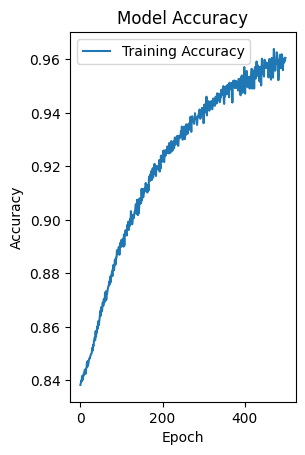

In [34]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

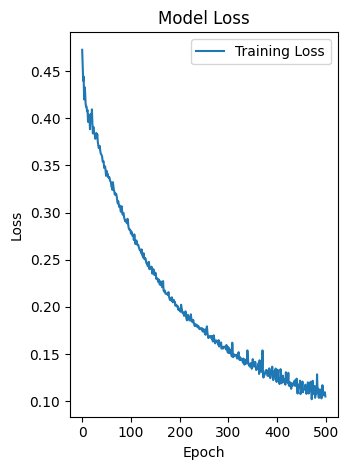

In [36]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')

plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

From the above, we can clearly see that as we increase the epochs, the training accuracy is increasing and model loss is decreasing.